In [7]:
import numpy as np

import multiprocessing

from matplotlib import pyplot as plt

from utils import data
from utils.hyperbolic_utils import hyperbolicity_sample

In [2]:
data_path = "./data"
tissue_hierarchy, ppi_networks, labels = data.read_data(data_path)

Read data:
	Tissue hierarchy with 219 nodes.
	144 tissue-specific PPI networks, with an average of 1906.99 nodes and 25462.24 edges.
	503 tissue-specific cellular functions (with 420 unique functions) covering 48 distinct tissues.


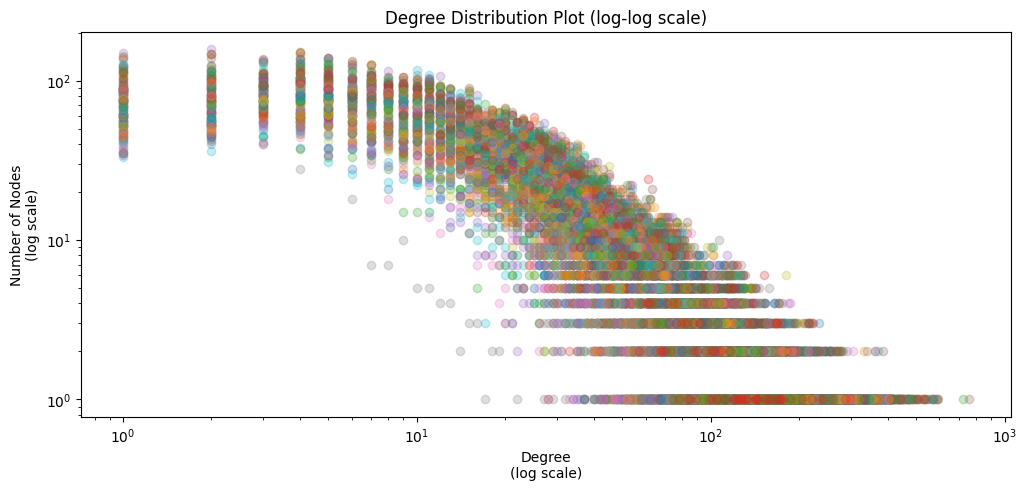

In [12]:
plt.figure(figsize=(12,5))
for tissue, G in ppi_networks.items():
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    degrees, degree_numbers = np.unique(degree_sequence, return_counts=True)
    plt.plot(degrees, degree_numbers, 'o', alpha = 0.25)
plt.title('Degree Distribution Plot (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.show()

In [9]:
with multiprocessing.Pool(30) as p:
   gromov_deltas = p.map(hyperbolicity_sample, [net for net in ppi_networks.values()])

In [11]:
print(np.mean(gromov_deltas))

1.1840277777777777
